# Quantum Arithmetic Logic Unit (ALU)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import qiskit
from qiskit import visualization, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
%matplotlib inline
from math import pi
from Circuits import getBloch, stateGenerator, getMeasure, makeCirc, makeCirc2, makeCirc3

In [3]:
backend = Aer.get_backend('statevector_simulator')

In [4]:
def makeALUCirc(n, op, inp):
    initState = op + inp
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [5]:
opLUT = {'+': '11000',
          '-': '11100',
          'xor': '10000',
         'xnor': '10100',
         'nop': '00000',
         '+1': '11010',
         '-1': '11111',
         'neg': '00100',
        }
#Look Up Table - FPGA, Dictionary in Python

In [6]:
def fillCirc(inp1, inp2, op):
    circuit = makeALUCirc(7, opLUT[op], str(inp1) + str(inp2))
    circuit.csx(0, 6)
    circuit.csx(5, 6)
    circuit.cx(0, 5)
    circuit.crx(-pi/2, 5, 6)
    circuit.cx(0, 5)
    circuit.csx(1, 6)
    circuit.csx(3, 6)
    circuit.cx(1, 3)
    circuit.crx(-pi/2, 3, 6)
    circuit.cx(2, 6)
    circuit.cx(4, 6)
    circuit.measure(6, 6)
    return circuit

In [7]:
def performOp(circuit, backend):
    return getMeasure(circuit, 1, backend)[0][0]

0000010
0
0000011
1


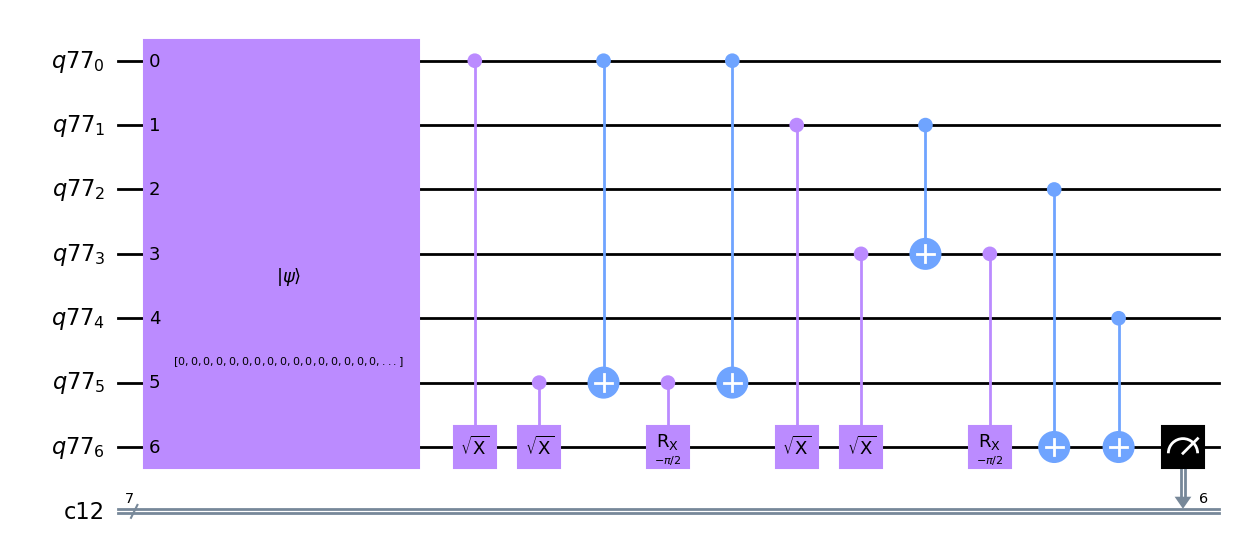

In [20]:
# first output string are the 7 bits inputted into the ALU (5 bits for op code, 1 for each input)
# second output string is the output from the ALU given the operation and inputs 
# example: nop, just returns B with no operation
circuit = fillCirc(1, 0, 'nop')
print(performOp(circuit, backend))
circuit = fillCirc(1, 1, 'nop')
print(performOp(circuit, backend))
circuit.draw('mpl')

In [10]:
# adds A and B together 
circuit = fillCirc(1, 0, '+')
print(performOp(circuit, backend))

1100010
1


In [21]:
# since only 2 bits, overflows when both 1s
circuit = fillCirc(1, 1, '+')
print(performOp(circuit, backend))

1100011
0


In [26]:
# returns opposite of B
circuit = fillCirc(0, 0, 'neg')
print(performOp(circuit, backend))

0010000
1


In [27]:
# exclusive or operation
circuit = fillCirc(1, 0, 'xor')
print(performOp(circuit, backend))

1000010
1


In [18]:
circuit = fillCirc(1, 1, 'xor')
print(performOp(circuit, backend))

1000011
0


In [37]:
# increment
# outputs 1 when neither A and B or both are 1s
# outputs 0 otherwise 
# think this is because a 0 starting condition is needed to output 1 (both 1s start as 0 due to overflow)
circuit = fillCirc(0, 0, '+1')
print(performOp(circuit, backend))

1101000
1


In [38]:
circuit = fillCirc(0, 1, '+1')
print(performOp(circuit, backend))

1101001
0


In [39]:
circuit = fillCirc(1, 1, '+1')
print(performOp(circuit, backend))

1101011
1
